In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/Users/lenovo_pc/Desktop/Multilinear Regression/data/50_Startups.csv',delimiter = ";")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          49 non-null float64
Administration     49 non-null float64
Marketing Spend    49 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


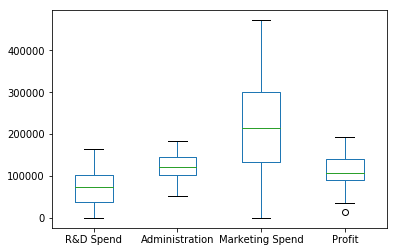

In [4]:
dataset.plot.box()

In [5]:
dataset = dataset.fillna(dataset.mean())

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [7]:
X = dataset.iloc[:,:-1]

In [8]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [9]:
Y = dataset.iloc[:,-1]

In [10]:
Y = Y.values.reshape(-1,1)

In [11]:
Y = pd.DataFrame(Y)

In [12]:
Y.shape

(50, 1)

In [13]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LE1 = LabelEncoder()
X.State = LE1.fit_transform(X.State)
OHE = OneHotEncoder(categorical_features = [3])
X = OHE.fit_transform(X.values).toarray()
X.shape

c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\lenovo_pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(50, 6)

In [14]:
X = pd.DataFrame(X)
X.head()
X = X.drop([1],axis = 1)
X.head()

,0,2,3,4,5
0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,162597.70,151377.59,443898.53
2,0.0,0.0,153441.51,101145.55,407934.54
3,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,0.0,142107.34,91391.77,366168.42


In [15]:
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler()
Y_s = StandardScaler()
X = X_s.fit_transform(X)
Y = Y_s.fit_transform(Y)

{'whiskers': [<matplotlib.lines.Line2D at 0xe9bae709e8>,
 'caps': [<matplotlib.lines.Line2D at 0xe9bae70e10>,
 'boxes': [<matplotlib.lines.Line2D at 0xe9bae70630>,
 'medians': [<matplotlib.lines.Line2D at 0xe9bae7a748>,
 'fliers': [<matplotlib.lines.Line2D at 0xe9bae7aa90>,
 'means': []}

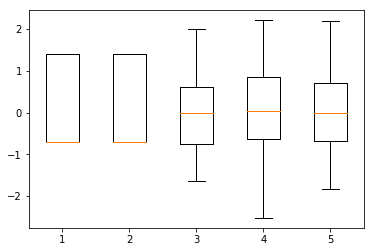

In [16]:
plt.boxplot(X)


In [17]:
pd.DataFrame(X).head()

,0,1,2,3,4
0,-0.717741,1.393261,2.011531,0.561826,2.187271
1,1.393261,-0.717741,1.950880,1.083894,1.949436
2,-0.717741,-0.717741,1.749052,-0.727219,1.642701
3,-0.717741,1.393261,1.549143,-0.095309,1.431738
4,-0.717741,-0.717741,1.499214,-1.078891,1.286479


In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)
regressor.intercept_,regressor.coef_

(array([-7.28857844e-16]),
 array([[ 0.01165348,  0.0059028 ,  0.89825659, -0.01282542,  0.10233165]]))

In [19]:
Y_pred_ss = regressor.predict(X)

In [20]:
Y_pred_ss


array([[ 2.02335193],
       [ 1.94997787],
       [ 1.73592336],
       [ 1.53912231],
       [ 1.47956318],
       [ 1.2826789 ],
       [ 1.12190109],
       [ 1.18379346],
       [ 0.99091426],
       [ 1.07107018],
       [ 0.55525527],
       [ 0.58194159],
       [ 0.40619092],
       [ 0.39242421],
       [ 0.91487699],
       [ 0.84031243],
       [ 0.13225452],
       [ 0.45472047],
       [ 0.40974526],
       [ 0.22902853],
       [ 0.13094829],
       [ 0.14357685],
       [ 0.0622319 ],
       [-0.0572547 ],
       [ 0.00322066],
       [-0.25065347],
       [-0.06963646],
       [ 0.07782308],
       [-0.28501545],
       [-0.27730158],
       [-0.3579411 ],
       [-0.38215075],
       [-0.35092992],
       [-0.00476635],
       [-0.55660005],
       [-0.54791354],
       [-0.9271693 ],
       [-0.56606172],
       [-1.06729211],
       [-0.70907454],
       [-0.92156713],
       [-0.95484344],
       [-1.0341152 ],
       [-1.31991599],
       [-1.19463463],
       [-1

In [21]:
import sklearn.metrics as eva
eva.mean_squared_error(Y,Y_pred_ss),eva.mean_squared_error(Y,Y_pred_ss)**0.5

(0.051525672864348705, 0.22699267138907525)

In [22]:
eva.r2_score(Y,Y_pred_ss)

0.9484743271356513

In [23]:
eva.mean_absolute_error(Y,Y_pred_ss)

0.16516295062146985

In [24]:
Y_s.inverse_transform(Y_pred_ss)

array([[192746.57208388],
       [189818.86779033],
       [181277.8608671 ],
       [173425.28583892],
       [171048.81230366],
       [163192.91616057],
       [156777.70761813],
       [159247.28004318],
       [151551.19131758],
       [154749.49934714],
       [134167.92586777],
       [135232.73879216],
       [128220.09686138],
       [127670.79019987],
       [148517.22171911],
       [145542.01520073],
       [117289.73770613],
       [130156.47824364],
       [128361.91861354],
       [121151.12572813],
       [117237.6177366 ],
       [117741.51088745],
       [114495.759464  ],
       [109728.11462569],
       [112141.14702199],
       [102011.29420317],
       [109234.0690816 ],
       [115117.86432387],
       [100640.2140353 ],
       [100948.00570951],
       [ 97730.4017188 ],
       [ 96764.41034582],
       [ 98010.1554337 ],
       [111822.45674138],
       [ 89803.69457774],
       [ 90150.29568438],
       [ 75017.58024316],
       [ 89426.16378087],
       [ 694